# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** Esse é um problema de classificação porque a variável que estamos prevendo é categórica e não contínua.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import f1_score

# Pretty display for notebooks
%matplotlib inline

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
n_students = student_data.shape[0]
print(n_students)

395


In [3]:
n_features = len(student_data.columns.values) - 1 #menos a coluna passed
print(n_features) #número de features

30


In [4]:
n_passed = student_data.passed.value_counts()['yes']
n_failed = sum(student_data.passed == "no")
print(n_passed)
print(n_failed)

265
130


In [5]:
grad_rate = float(n_passed)/float(n_students) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [6]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head(5)


Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [7]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))
nomesVar = list(X_all.columns)

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [8]:
X_all.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4


**Padronizar as variaveis** Para alguns dos algoritmos que utilizaremos é necessário ter as variáveis padronizadas com média igual a 0 e desvio padrão igual a 1.

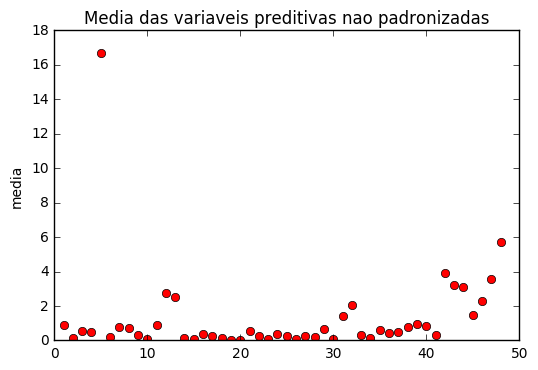

In [9]:
medias0 = X_all.mean(axis = 0)
desvios0 = X_all.std(axis=0)
eixo = np.array(range(len(medias0))) + 1
plt.plot(eixo, medias0, 'ro')
plt.ylabel('media')
plt.title('Media das variaveis preditivas nao padronizadas')


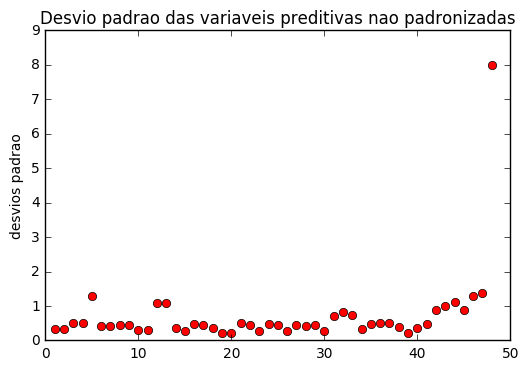

In [10]:
plt.plot(eixo, desvios0, 'ro')
plt.ylabel('desvios padrao')
plt.title('Desvio padrao das variaveis preditivas nao padronizadas')


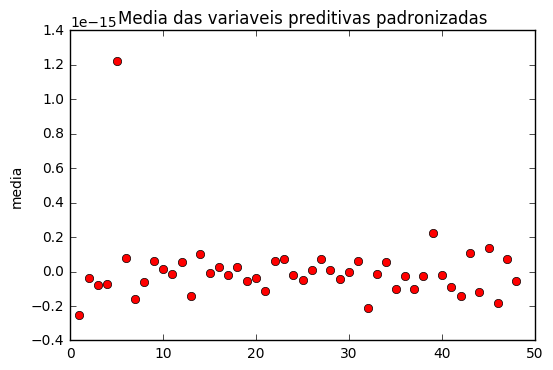

In [11]:
from sklearn import preprocessing
X_all = preprocessing.scale(X_all)
medias0 = X_all.mean(axis = 0)
desvios0 = X_all.std(axis=0)
eixo = np.array(range(len(medias0))) + 1
plt.plot(eixo, medias0, 'ro')
plt.ylabel('media')
plt.title('Media das variaveis preditivas padronizadas')

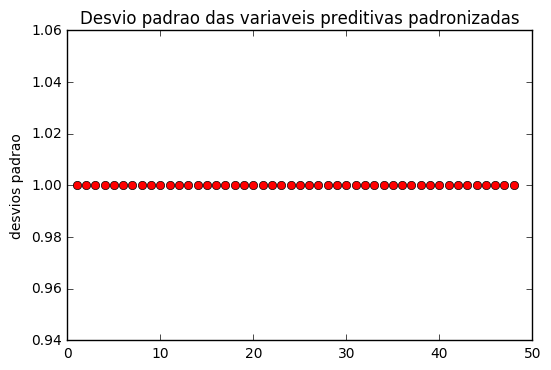

In [12]:
plt.plot(eixo, desvios0, 'ro')
plt.ylabel('desvios padrao')
plt.title('Desvio padrao das variaveis preditivas padronizadas')

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [33]:
from sklearn.model_selection import train_test_split
# TODO: Import any additional functionality you may need here
X_train, X_test, y_train, y_test  = train_test_split(X_all, y_all,test_size=0.24, 
                                                     random_state=123, stratify = y_all)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


print "Taxa de graduados no conjunto de treinamento: {:.2f}%".format(100 * (y_train == 'yes').mean())
print "Taxa de graduados no conjunto de teste: {:.2f}%".format(100 * (y_test == 'yes').mean())

Training set has 300 samples.
Testing set has 95 samples.
Taxa de graduados no conjunto de treinamento: 67.00%
Taxa de graduados no conjunto de teste: 67.37%


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

395 observacoes sendo 300 para training e 95 para teste. 48 features para previsao

**Gaussian Naive Bayes**: 
Esse modelo é utilizado normalmente em análise de texto: como prever se um e-mail é ou não é *spam*.
http://sebastianraschka.com/Articles/2014_naive_bayes_1.html#the-decision-rule-for-spam-classification
https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering

As vantagens desse modelos é que ele é simples e, por isso, seu algoritmo é fácil de ser implementado e funciona melhor, que outros modelos mais complexos, quando temos poucos dados e muitas variáveis.
Uma desvantagem desse método é ele assumir que as variáveis previsoras são independentes condicionado a informação da variável resposta. Isso nunca é verdadeiro mas algumas vezes essa dependência condicional é irrelevante e a facilidade de implementação, principalmente quando temos muitas variáveis e poucas observações, supera essa desvantagem.
Outra desvantagem desse algoritmo é que ele não captura não linearidades na dependência entre as variáveis preditivas contínuas e a variável dependente.

Para esse modelo, se as variáveis contínuas não tiverem distribuição normal, é recomendado que elas sejam normalizadas. O algoritmo assume que a distribuição da variável contínua dado a variável resposta possui distribuição normal .

No nosso modelo a hipotese de independência condicional é falsa, por exemplo, dado que o aluno passou ou não, a informaão da quantidade de anos de educação do pai ainda contém informação a respeito da quantidade de anos de educação da mãe. No entanto, temos também poucos dados (695 observações).Como há poucos dados para muitas variáveis preditivas (41) esse modelo pode ser bom para o problema desse caso.

**Logistic Regression**
Esse modelo é utilizado na indústria em análise de concessão de crédito. Prevendo a probabilidade do cliente não honrar a dívida.
https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Financial-Services/gx-be-aers-fsi-credit-scoring.pdf
As vantagens desse modelo é que ele é simples e rápido de ser implementado e interpretado.

Por ser simples o modelos está menos sujeito ao risco de overfitting dos dados. Como o modelo é totalmente paramétrico e estima uma equação que explica a relação entre as variáveis preditivas e a variável dependente, é muito fácil interpretar o modelo. Isso facilita a visualização e o entendimento das previsões feitas pelo modelo estimado e, dessa forma, facilita saber se o modelo está se comportando conforme o esperado e facilita apresentar os resultados desse para pessoas leigas.

As desvantagens é que por ser simples é difícil de fazê-lo capturar não linearidades existentes nos dados. Para isso é necessário inserir as variáveis preditivas e suas não linearidades (exemplo polinomio dela) explicitamente no modelo já que, a estimação não resulta em um algoritmo que torne o modelo estimado flexível o suficiente para capturar não linearidades.

Esse algoritmo pode ser o ideal para nossos dados porque é fácil de interpretar seus resultados e nosso modelo possui poucas observação e muitas variáveis previsoras (41) então um modelo muito flexível possui um maior risco de overfitting.

**knn**
knn é um algoritmo utilizado quando queremos classificar os itens por similaridade. Nesse contexo ele é utilizado na detecção de falhas pois a partir de uma amostra inicial que já sabemos o resultado da variável dependente podemos classificar novos itens por similaridade.
http://fumblog.um.ac.ir/gallery/170/Fault%20Detection%20Using%20the%20k-Nearest%20Neighbor%20Rule%20for%20Semiconductor%20Manufacturing%20Processes.pdf

A vantagem do knn é que não é necessário treinar o modelo, as previsões de novos dados são feitas simplesmente comparando as novas amostras com as já observadas e classificando-as de acordo com a similaridade. Dessa maneira é possível construir previsões a partir de poucas observações. Outra vantagem é que é fácil de entender as previsões realizadas pelo modelo uma vez que a regra de classificação é bem simples. Além disso, o algoritmo tem capacidade de produzir modelos preditivos totalmente não lineares já que é um modelo não paramétrico.

A desvantagem desse método é que ele pode ser lento para fazer previsões, como não utiliza uma equação paramétrica para fazer previsão é preciso calcular a distância entre a nova observação e todas outras da amostra de treino. Uma outra desvantagem é que por ser muito flexível o modelo é mais sujeito a overfitting. Além disso, como o algoritmo depende de uma medidade de distância entre os pontos é necessário normalizar as variáveis. 

Esse algoritmo, ao contrário, dos apresentados anteriormente é muito flexível e seu algoritmo tem o potencial de capturar uma não linearidade na relação enre as variáveis preditivas e a variável dependente, por isso, se isso for algo importante nos nossos dados esse algoritmo se dará melhor que os anteriores na tarefa de previsão.








### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [34]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    return round(end - start,3)
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    return [end - start, f1_score(target.values, y_pred, pos_label='yes')]


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size    
    # Train the classifier
    tempoTreinamento = train_classifier(clf, X_train, y_train)
    tempoPrevTreino, prevTreino = predict_labels(clf, X_train, y_train)
    tempoPrevTeste, prevTeste = predict_labels(clf, X_test, y_test)
    
    # Print the results of prediction for both training and testing
    return [clf.__class__.__name__, len(X_train), 
            round(tempoTreinamento, 3),round(prevTreino,3),round(tempoPrevTeste,3),
            round(prevTeste,3)]

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [60]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state=123)
clf_C = KNeighborsClassifier()

resultado = []
scoreTrain = []
scoreTeste = []
nObs = []
nomeModelo = []

for modelo in [clf_A, clf_B, clf_C]:
    for n in [100, 200, 300]:
        x = X_train[:n]
        y = y_train[:n]
        temp = train_predict(modelo, x, y, X_test, y_test)
        resultado.append(temp)
        scoreTrain.append(temp[3])
        scoreTeste.append(temp[5])
        nomeModelo.append(temp[0])
        nObs.append(n)

print resultado      



[['GaussianNB', 100, 0.001, 0.829, 0.0, 0.703], ['GaussianNB', 200, 0.002, 0.753, 0.0, 0.689], ['GaussianNB', 300, 0.001, 0.788, 0.0, 0.754], ['LogisticRegression', 100, 0.002, 0.885, 0.0, 0.729], ['LogisticRegression', 200, 0.002, 0.84, 0.0, 0.731], ['LogisticRegression', 300, 0.007, 0.844, 0.001, 0.731], ['KNeighborsClassifier', 100, 0.001, 0.862, 0.006, 0.735], ['KNeighborsClassifier', 200, 0.001, 0.844, 0.003, 0.776], ['KNeighborsClassifier', 300, 0.001, 0.836, 0.009, 0.763]]


   nObs            nomeModelo  scoreTeste  scoreTrain
0   100            GaussianNB       0.703       0.829
1   200            GaussianNB       0.689       0.753
2   300            GaussianNB       0.754       0.788
3   100    LogisticRegression       0.729       0.885
4   200    LogisticRegression       0.731       0.840
5   300    LogisticRegression       0.731       0.844
6   100  KNeighborsClassifier       0.735       0.862
7   200  KNeighborsClassifier       0.776       0.844
8   300  KNeighborsClassifier       0.763       0.836


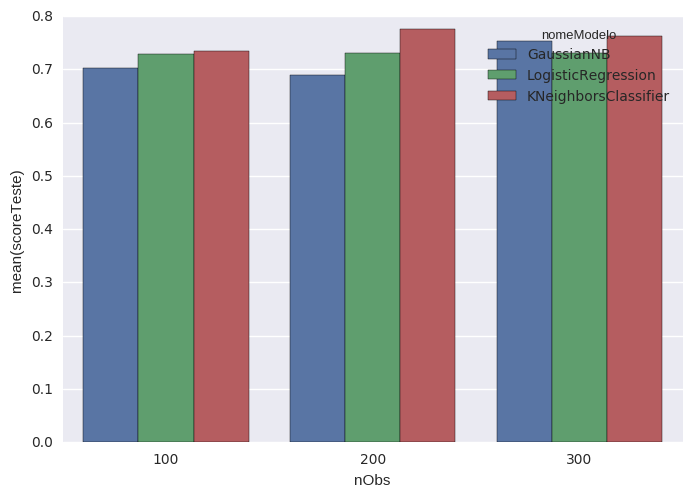

In [62]:
df = pd.DataFrame(
    {'nomeModelo': nomeModelo,
     'scoreTrain': scoreTrain,
     'scoreTeste': scoreTeste,
     'nObs': nObs
    })

print df

import seaborn as sns

sns.barplot(x="nObs", y="scoreTeste", hue="nomeModelo", data=df);

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Gaussian NB**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |          0.004s         |            0.001s            |     0.829             |     0.703            |
| 200               |        0.004s          |             0.001s           |        0.753          |        0.689         |
| 300               |         0.012s                |      0.001s                  |      0.788            |    0.754      |

** Classifer 2 - Logistic Regression**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.038s                 |         0s               |       0.885           |     0.729            |
| 200               |     0.001s             |                0s        |     0.840             |      0.731           |
| 300               |       0.01s                  |         0s             |           0.844       |     0.731    |

** Classifer 3 - k nearest**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.004s                |           0.006s             |         0.862       |        0.735         |
| 200               |         0.002s                |            0.008s            |         0.844         |      0.776           |
| 300               |         0.003s                |           0.013s             |         0.836         |      0.763          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
O modelo escolhido foi o k nearest neighbour. O modelo foi o melhor independente do tamanho da amostra de treino (n), como mostrado no gráfico de barras.
Aparentemente a regressão logística não tem ganhos quando aumentamos o tamanho da amostra. Provavelmente por se tratar de um modelo muito simples para a complexidade dos dados então o aumento da amostra não está resultando em ganhos no F1 score para os dados de teste.
Se obtivermos mais observações, vale a pena continuar testando com o modelo Gaussian Naive Bayes pois, como pode ser visto no gráfico, esse modelo está tendo ganhos no F1 score da amostra de teste quando aumentamos a quantidade de observações usadas na estimação.
No entanto, para os tamanhos de amostra disponíveis o melhor modelo é o knn. 
Quanto ao tempo de estimação e previsão nenhum dos modelos se mostrou inferior visto que na amostra desse tamanho todos os modelos rodaram com grande rapidez e facilidade.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **
O modelo escolhido k nearest neighbour funciona de uma maneira bem simples, para toda nova observação analisamos a semelhança das características dela com as características das observações das quais temos a informação do resultado final (passou ou falhou).

Essa semelhança entre as observações é feita de acordo com uma métrica de distância nas variáveis normalizadas para que a unidade da variável não afete a previsão.

Exemplo:

Suponha que tenhamos apenas duas variáveis previsoras idade e gênero e tenhamos as seguintes observações:

* idade 14, absences 1, passou
* idade 16, absences 10, falhou
* idade 15, absences 0, falhou
* idade 15, absences 20, falhou

E queremos prever a observação abaixo

* idade 14, absences 0

As observações mais semelhantes são: 

* idade 14, absences 1, passou
* idade 15, absences 0, falhou

Note que a diferença dos valores das variáveis dessa nova observação é igual a 1 quando comparada com os valores já observados acima destacados.

Para continuar essa comparação (e decidir com quem a nova observação é mais semelhante) temos que normalizar as variáveis porque a variável absences (varia entre 0 e 20) tem uma variação muito maior que idade (varia entre 14 e 16).

Após a normalização a nova observação será mais semelhante à observação:

* idade 14, absences 1, passou

Pois a diferença de idade é mais relevante que a diferença em absences uma vez que a variância da última é menor.

Nesse caso iremos prever que o aluno passou visto que o novo dado é mais semelhante com uma observação que sabemos que passou.

No exemplo acima descrevemos o algoritmo como se k igual a 1, ou seja, só levamos em consideração a observação mais "similar" para fazer a previsão. No entanto, o algoritmo permite ajustar esse parâmetro k e dessa maneira, por exemplo, fazer a previsão levando em consideração não só a observação mais semelhante mas sim as k observações mais semelhantes. Dessa maneira avaliamos se a maioria das observações semelhantes é passou ou não passou.

O resultado do modelo apresentado acima foi obtido usando-se k igual a 5.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [74]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn import grid_search
# TODO: Create the parameters list you wish to tune
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10] }

cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.10, random_state = 0)

# TODO: Initialize the classifier
clf = KNeighborsClassifier()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label = "yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = grid_search.GridSearchCV(estimator = clf, param_grid = parameters, scoring = f1_scorer, cv = cv_sets)


# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print(clf)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [67]:
tempo, prevTreino = predict_labels(clf, X_train, y_train)
tempo, prevTeste = predict_labels(clf, X_test, y_test)

In [68]:
# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(prevTreino)
print "Tuned model has a testing F1 score of {:.4f}.".format(prevTeste)

Tuned model has a training F1 score of 0.8114.
Tuned model has a testing F1 score of 0.7919.


In [72]:
clf_default = KNeighborsClassifier()
clf_default.fit(X_train, y_train)
#Resultados do modelo default
tempo, prevTreino2 = predict_labels(clf_default, X_train, y_train)
tempo, prevTeste2 = predict_labels(clf_default, X_test, y_test)
print "Tuned model has a training F1 score of {:.4f}.".format(prevTreino2)
print "Tuned model has a testing F1 score of {:.4f}.".format(prevTeste2)

Tuned model has a training F1 score of 0.8364.
Tuned model has a testing F1 score of 0.7626.


In [73]:
print clf.get_params
print clf_default.get_params

<bound method KNeighborsClassifier.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')>
<bound method KNeighborsClassifier.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
O modelo escolhido foi o com k igual a 9, ou seja, ele usa as 9 observações mais próximas em que o resultado é conhecido para fazer a previsão da nova observação. a performance do novo modelo no conjunto de dados de teste é de 0.7919 maior que a obtida pelo modelo com k igual a 5 (o default) que foi de 0.7626.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.